<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/MonteCarlo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inverse transform sampling

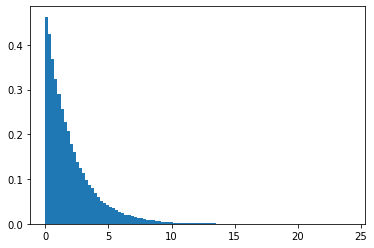

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=100000
lambd = 0.5

# an exponential function
def func_exp(x, lambd):
  return lambd*np.exp(-lambd*x)

# inverse of an exponential function
def func_invexp(x, lambd):
  return -np.log(1-x)/lambd

Xrand = np.random.random(N)
Y_exp = func_invexp(Xrand, lambd)   

plt.hist(Y_exp, bins=100, density=True)
plt.show()

# Box Muller Gaussian sampling

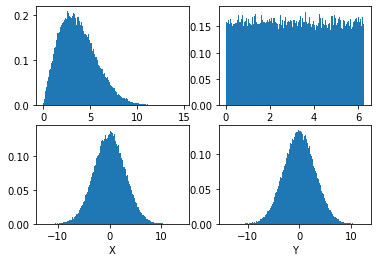

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=100000
sigma = 3.

def func(x):
  return np.sqrt(-2*sigma*sigma*np.log(1-x))

xi_rand = np.random.random(N)
r = func(xi_rand)

theta = np.random.random(N)*2*np.pi
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.figure(1)
plt.subplot(221)
plt.hist(r, bins=200, density=True)
plt.xlabel("r")
plt.subplot(222)
plt.hist(theta, bins=200, density=True)
plt.xlabel("theta")

plt.subplot(223)
plt.hist(x, bins=200, density=True)
plt.xlabel("X")
plt.subplot(224)
plt.hist(y, bins=200, density=True)
plt.xlabel("Y")
plt.show()

# Rutherford scattering

A beam of 1 million alpha particles hiting a nucleus and calculate the fraction of particles that bounce back on scattering, i.e., that scatter through angles greater than 90 degree. 

Define $b=\frac{Ze^2}{2\pi\epsilon_0E}$ and if $b$ is less than this value then the particle bounces back.

In [ ]:
from math import sqrt,log,cos,sin,pi
from random import random

# Constants
Z = 79
e = 1.602e-19
E = 7.7e6*e
epsilon0 = 8.854e-12
a0 = 5.292e-11
sigma = a0/100
N = 1000000

# Function to generate two Gaussian random numbers
def gaussian():
    r = sqrt(-2*sigma*sigma*log(1-random()))
    theta = 2*pi*random()
    x = r*cos(theta)
    y = r*sin(theta)
    return x,y

# Main program
count = 0
for i in range(N):
    x,y = gaussian()
    b = sqrt(x*x+y*y)
    if b<Z*e*e/(2*pi*epsilon0*E):
        count += 1

print(count,"particles were reflected out of",N)

1614 particles were reflected out of 1000000


# Acceptance rejection sampling (hit-or-miss)

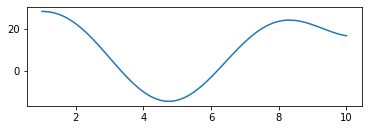

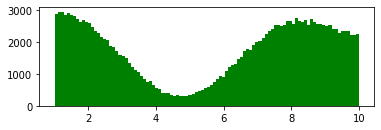

Eff =  0.5855066666666666


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

x = np.linspace(1,10,100)
y = 15*np.sin(x) + (x-5)**2

plt.subplot(211)
plt.plot(x, y)
plt.show()

randNum=[]
N = 300000
for i in range(N):
  r = rnd.random()
  x_value = 1 + (10-1)*rnd.random()   # generate a random number between the range 1 and 10

  # add 20 to make sure the value is positive, then divided by the maximum value after adding 20 to make the ratio value between 0 and 1
  ratio = (15*np.sin(x_value) + (x_value-5)**2 + 20)/50   
  if(r < ratio):
    randNum.append(x_value)

plt.subplot(212)
plt.hist(randNum, bins=100, color='g')
plt.show()

print("Eff = ", len(randNum)/N)

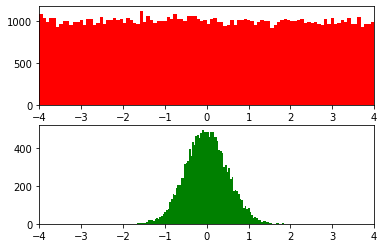

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N=100000
mu = 0.
sigma = 0.5

x = []
gauss = []
for i in range(N):
    x_value = 8*np.random.random()-4    # a random number between -4 and 4
    gauss_value = np.exp(-(x_value - mu)**2 / (2 * sigma**2))    

    x.append(x_value)

    r = np.random.random()

    ratio = gauss_value/1.
    if r < ratio:
        gauss.append(x_value)

plt.figure(1)
plt.subplot(211)
plt.hist(x, bins=100, facecolor='r')
plt.xlim(-4, 4)

plt.subplot(212)
plt.hist(gauss, bins=100, facecolor='g')
plt.xlim(-4, 4)
plt.show()

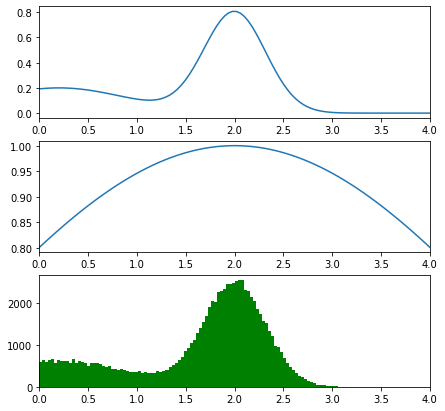

In [ ]:
import random as rnd
import math as M
import matplotlib.pyplot as plt
import numpy as np

# parameters for a gaussian distribution
mu, sig = 2.0, 3.

# distribution we want to sample
def f(x):
    return 0.2 * M.exp(-(x - 0.2)**2.0) + 0.8 * M.exp(-(x - 2.0)**2.0 / 0.2)
f2 = np.vectorize(f)

def g(x):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
g2 = np.vectorize(g)

# hit or miss
def sample_f():
    Stop = False
    x_sampling = 0.
    while not Stop:
        x_rand = rnd.gauss(mu, sig) # Generate x_rand according to a known distribution g(x) here
        u = rnd.random() # y = u * g(x_rand)
        if(f(x_rand)/g(x_rand)>=1.):
          print("For this point, you have f >= g, which should be avoid, please choose a different g(x) function to make sure f(x)<g(x) over the x range of interest")
        if u <= f(x_rand) / g(x_rand):  # y <= f(x_rand)
            Stop = True
            x_sampling = x_rand
    return x_sampling

plt.figure(figsize=(7, 7))
plt.subplot(311)
x = np.linspace(0, 4, 100)
y = f2(x)
plt.xlim(0, 4.)
plt.plot(x, y)

plt.subplot(312)
x = np.linspace(0, 4, 100)
z = g2(x)
plt.xlim(0, 4.)
plt.plot(x, z)

# plot a distribution with given weights
plt.subplot(313)
samples = []
for i in range(100000):
    x_sampling_f = sample_f()
    samples.append(x_sampling_f)

plt.hist(samples, bins=200, facecolor='g')
plt.xlim(0, 4.)
plt.show()

# Histogram weights

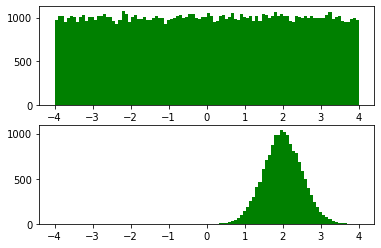

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# plot a random number distribution between -4 and 4
plt.subplot(211)
y = 8*np.random.random(100000)-4
plt.hist(y, bins=100, facecolor='g')

# plot a distribution with given weights
plt.subplot(212)
mu = 2.
sigma = 0.5
wt = np.exp(-(y - mu)**2 / (2 * sigma**2))
plt.hist(y, bins=100, facecolor='g', weights=wt)

# show the distribution
plt.show()

*apply mass-dependent efficiency on particle detection*
Assume that our detector has a detection efficiency that depends on the mass of the particle, if the particle mass is $<20$, then the efficiency is $\epsilon = 0.002 \times m$; however, if the mass is $>20$, the efficiency becomes $\epsilon = 0.01 \times m$. Assume the particle's mass has a gaussian distribution centered at 20 with a width of 3

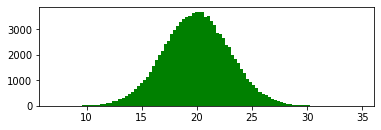

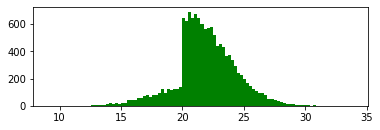

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# random numbers with gaussian distribution
N = 100000
mu = 20.
sigma = 3.

# mass-dependent detection efficiency for a particle
def eff(m):
  eff = 0.
  if m<20.:
    eff = 0.002*m
  else:
    eff = 0.01*m
  return eff

Mass = []
Mass_detected = []
for i in range(N):
  mass_event = np.random.normal(mu, sigma)
  Mass.append(mass_event)

  # apply mass-dependent efficiency
  eff_rand = np.random.random()
  if(eff_rand < eff(mass_event)):
    Mass_detected.append(mass_event)

# plot of the particle's mass before the detection
plt.subplot(211)
plt.hist(Mass, bins=100, facecolor='g')
plt.show()

# plot of the particle's mass after the detection
plt.subplot(212)
plt.hist(Mass_detected, bins=100, facecolor='g')
plt.show()

# MC integration

Like the $\pi$ calculation using the MC method, we can also find the maximum value of the function in the whole range, and throw points randomly and see how often it lies under the curve

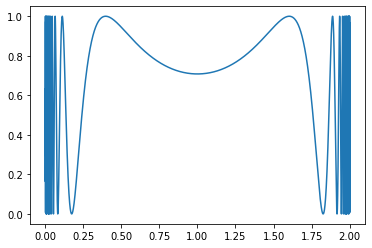

Integral =  1.4516


In [ ]:
from math import sin
from random import random
import matplotlib.pyplot as plt

def f(x):
  return (sin(1/(x*(2-x))))**2
f2=np.vectorize(f)

xpoints = np.arange(0.001, 1.9999, 0.0001)
plt.plot(xpoints, f2(xpoints))
plt.show()

# use MC method
N = 10000
count = 0

# we can find the maximum value is 1 for the whole range
# so we can throw random numbers to the box area 0<x<2 and 0<y<1
for i in range(N):
  xp = 2*random()
  r = random()
  if r < f(xp):
    count += 1

I = 2*count/N
print("Integral = ", I)

**Mean value method (easily extendable to multiple integrals)**

$I = \int_a^b \int_c^d f(x, y) dx dy = (b-a)*(d-c)*\frac{1}{N} \sum_{k=1}^{N} f(x_k, y_k)$ where $x_k, y_k$ are randomly-chosen points within the region with $a<x<b$ and $c<y<d$. This method can be extended to higher dimensions.

![](https://drive.google.com/uc?export=view&id=1F40VuDIRKw5kfmW6slFOcRJnPaH9dkAs)


In [ ]:
import numpy as np

ax, bx = 0, 2
ay, by = 0, 4

def f(x, y):
    return (x + y)**2
    
N=400000
rx = (bx-ax)*np.random.random(N)
ry = (by-ay)*np.random.random(N)
values = f(rx, ry)

sum = np.sum(values)

integral = (bx-ax)*(by-ay)*sum*(1./N)
print("Integral = ", integral)

Integral =  85.3541837368095


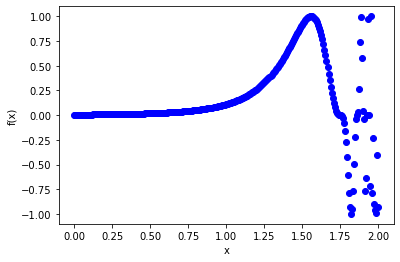

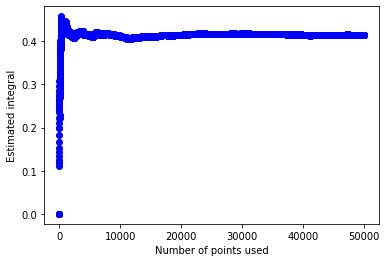

In [ ]:
import numpy as np
from random import random
from matplotlib import pyplot as plt

# integrate this function from 0 to 2
def f(x):
  return (np.sin(x/(x*(2-x)*(3-x))))**3

epsilon = 1e-6
xmin, xmax = epsilon, 2-epsilon
N = 50000

xpoints = np.linspace(xmin, xmax, 300)
ypoints = f(xpoints)

xlist = []
ylist=[]
count = 0

for i in range(N):
  randx = 2*random()
  randy = random()
  if (randy < f(randx)):
    count = count + 1
  ylist.append(2*count/(i+1))
  xlist.append(i+1)

plt.figure()
plt.scatter(xpoints, ypoints, color='b')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.figure()
plt.scatter(xlist, ylist, color='b')
plt.xlabel("Number of points used")
plt.ylabel("Estimated integral")
plt.show()

# Importance sampling

Will be more efficient if we can start from a distribution that is close to the one we want to sample 


### Use the MC method to figure fraction of events with x>3 for a normal distribution (real value should be 0.0013499).

In [ ]:
import numpy as np

# define a gaussian distribution
def gaus(x, mu, sigma):
  return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

# get a gaussian distribution with mu=0 and sigma=1
def f(x):
  return gaus(x, 0., 1.)

# shift another gaussian distribution close to 3 and sample that function
# define a gaussian distribution with mu=4 and sigma=1
def g(x):
  return gaus(x, 4., 1.)

def h(x):
  return x>3

N = 1000000

print("The truth integral is 0.0013499")

# normal MC method
X = np.random.normal(0., 1., N)
ind_below = np.where(X > 3.)
print("If we use the normal mean value method, integral = ", len(ind_below[0])/N)

# use the importance sampling method 
# and use another gaussian distribution with 
# the mean value shifted to 4 to sample the original gaussian function
Y = np.random.normal(4, 1, N)
sum = np.sum(h(Y)*f(Y)/g(Y))   # the area is normalized to 1 for the new gaussian distribution
print("Use the importance sampling method, integral = ", sum/N)

The truth integral is 0.0013499
If we use the normal mean value method, integral =  0.001357
Use the importance sampling method, integral =  0.0013481489362915011


### another example to use the importance sampling for the integral calculation

Since the chosen omega(x) has a similar shape as f(x) and is always bigger than f(x) at every point, can also use the acceptance-rejection method (more efficient than choosing the maximum for the normalization)

Integral from scipy =  (0.7460317460317434, 2.425232681346756e-09)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


Integral =  0.7458091189363455


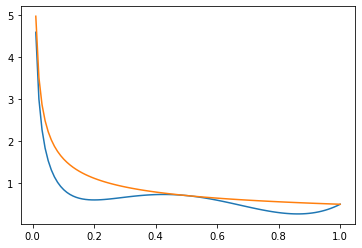

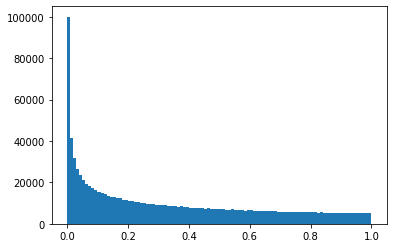

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def f(x):
  return (1-8*x+40*x**2-64*x**3+32*x**4)/(2*x**(1/2))

def omega(x):
  return x**(-1/2)/2

def g(x):
  return 1-8*x+40*x**2-64*x**3+32*x**4

# inverse of the omega function
def inv_omega(x):
  return x**2

I_scipy = integrate.quad(f, 0, 1.)
print("Integral from scipy = ", I_scipy)

# plot the function f
plt.figure(211)
x = np.linspace(0,1,100)    
y = f(x)
y_omega = omega(x)
plt.plot(x, y)
plt.plot(x, y_omega)

# generate random numbers following the omega(x) distribution using the inverse transform sampling method, the normalization is 1/2
plt.figure(212)
N = 1000000
x_rand = np.random.random(N)
omega_inv = inv_omega(x_rand)
plt.hist(omega_inv, bins=100)

I = np.sum(g(omega_inv))/N
print("Integral = ", I)
plt.show()